In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = 'data/mouse_drug_data.csv'
clinical_trial_data_to_load = 'data/clinicaltrial_data.csv'

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_data, mouse_data, how = 'left', on = ['Mouse ID'])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume_mean = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor = pd.DataFrame(data=tumor_volume_mean).reset_index()

# Preview DataFrame
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor = pd.DataFrame(data=tumor_volume_sem).reset_index()

# Preview DataFrame
sem_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
capomulin = combined_data[combined_data['Drug'] == "Capomulin"]
ceftamin = combined_data[combined_data['Drug'] == "Ceftamin"]
infubinol = combined_data[combined_data['Drug'] == "Infubinol"]
ketapril = combined_data[combined_data['Drug'] == "Ketapril"]
naftisol = combined_data[combined_data['Drug'] == "Naftisol"]
placebo = combined_data[combined_data['Drug'] == "Placebo"]
propriva = combined_data[combined_data['Drug'] == "Propriva"]
ramicane = combined_data[combined_data['Drug'] == "Ramicane"]
stelasyn = combined_data[combined_data['Drug'] == "Stelasyn"]
zoniferol = combined_data[combined_data['Drug'] == "Zoniferol"]

capomulin_mean = capomulin.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
ceftamin_mean = ceftamin.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
infubinol_mean = infubinol.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
ketapril_mean = ketapril.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
naftisol_mean = naftisol.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
placebo_mean = placebo.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
propriva_mean = propriva.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
ramicane_mean = ramicane.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
stelasyn_mean = stelasyn.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']
zoniferol_mean = zoniferol.groupby(['Timepoint']).mean()['Tumor Volume (mm3)']

reformat_mean = pd.DataFrame({'Capomulin' : capomulin_mean, 'Ceftamin' : ceftamin_mean,
                    'Infubinol' : infubinol_mean, 'Ketapril': ketapril_mean, 'Naftisol' : naftisol_mean,
                    'Placebo' : placebo_mean, 'Propriva' : propriva_mean, 'Ramicane' : ramicane_mean, 
                    'Stelasyn' : stelasyn_mean, 'Zoniferol' : zoniferol_mean})

reformat_mean.columns.names = ['Drug']

reformat_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


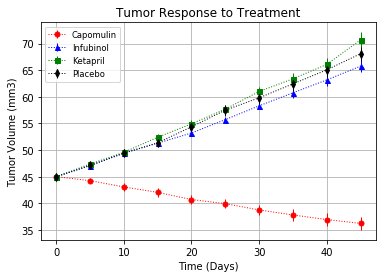

In [6]:
# Generate the Plot (with Error Bars)

x = sem_tumor['Timepoint'].unique()

capomulin_yerr = capomulin.groupby(['Timepoint']).sem()['Tumor Volume (mm3)']
infubinol_yerr = infubinol.groupby(['Timepoint']).sem()['Tumor Volume (mm3)']
ketapril_yerr = ketapril.groupby(['Timepoint']).sem()['Tumor Volume (mm3)']
placebo_yerr = placebo.groupby(['Timepoint']).sem()['Tumor Volume (mm3)']

plt.errorbar(x, capomulin_mean, yerr = capomulin_yerr, color = 'red', marker = 'o', label = 'Capomulin', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)
plt.errorbar(x, infubinol_mean, yerr = infubinol_yerr, color = 'blue', marker = '^', label = 'Infubinol', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)
plt.errorbar(x, ketapril_mean, yerr = ketapril_yerr, color = 'green', marker = 's', label = 'Ketapril', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)
plt.errorbar(x, placebo_mean, yerr = placebo_yerr, color = 'black', marker = 'd', label = 'Placebo', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)

plt.legend(fontsize = 8.35)
plt.grid()
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure
plt.savefig("Images/Tumor_Response.png")

# Show the Figure
plt.show()

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_metastatic = pd.DataFrame(data=metastatic_mean)

# Preview DataFrame
mean_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_metastatic = pd.DataFrame(data=metastatic_sem)

# Preview DataFrame
sem_metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames

capomulin_meta_mean = capomulin.groupby(['Timepoint']).mean()['Metastatic Sites']
ceftamin_meta_mean = ceftamin.groupby(['Timepoint']).mean()['Metastatic Sites']
infubinol_meta_mean = infubinol.groupby(['Timepoint']).mean()['Metastatic Sites']
ketapril_meta_mean = ketapril.groupby(['Timepoint']).mean()['Metastatic Sites']
naftisol_meta_mean = naftisol.groupby(['Timepoint']).mean()['Metastatic Sites']
placebo_meta_mean = placebo.groupby(['Timepoint']).mean()['Metastatic Sites']
propriva_meta_mean = propriva.groupby(['Timepoint']).mean()['Metastatic Sites']
ramicane_meta_mean = ramicane.groupby(['Timepoint']).mean()['Metastatic Sites']
stelasyn_meta_mean = stelasyn.groupby(['Timepoint']).mean()['Metastatic Sites']
zoniferol_meta_mean = zoniferol.groupby(['Timepoint']).mean()['Metastatic Sites']

reformat_meta_mean = pd.DataFrame({'Capomulin' : capomulin_meta_mean, 'Ceftamin' : ceftamin_meta_mean,
                    'Infubinol' : infubinol_meta_mean, 'Ketapril': ketapril_meta_mean, 'Naftisol' : naftisol_meta_mean,
                    'Placebo' : placebo_meta_mean, 'Propriva' : propriva_meta_mean, 'Ramicane' : ramicane_meta_mean, 
                    'Stelasyn' : stelasyn_meta_mean, 'Zoniferol' : zoniferol_meta_mean})

reformat_meta_mean.columns.names = ['Drug']

# Preview that Reformatting worked
reformat_meta_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


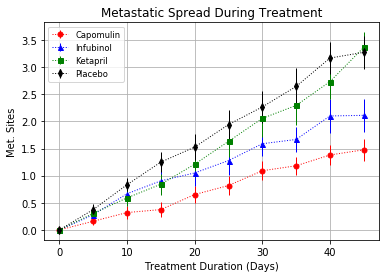

In [10]:
# Generate the Plot (with Error Bars)

capomulin_meta_yerr = capomulin.groupby(['Timepoint']).sem()['Metastatic Sites']
infubinol_meta_yerr = infubinol.groupby(['Timepoint']).sem()['Metastatic Sites']
ketapril_meta_yerr = ketapril.groupby(['Timepoint']).sem()['Metastatic Sites']
placebo_meta_yerr = placebo.groupby(['Timepoint']).sem()['Metastatic Sites']

plt.errorbar(x, capomulin_meta_mean, yerr = capomulin_meta_yerr, color = 'red', marker = 'o', label = 'Capomulin', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)
plt.errorbar(x, infubinol_meta_mean, yerr = infubinol_meta_yerr, color = 'blue', marker = '^', label = 'Infubinol', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)
plt.errorbar(x, ketapril_meta_mean, yerr = ketapril_meta_yerr, color = 'green', marker = 's', label = 'Ketapril', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)
plt.errorbar(x, placebo_meta_mean, yerr = placebo_meta_yerr, color = 'black', marker = 'd', label = 'Placebo', linestyle = ':', elinewidth = 1, markersize = 5, linewidth = 1)

plt.legend(fontsize = 8.35)
plt.grid()
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

# Save the Figure
plt.savefig("Images/Metastatic_Spread.png")

# Show the Figure
plt.show()


In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_sum = combined_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
sum_mouse = pd.DataFrame(data=mouse_sum).reset_index()
sum_mouse = sum_mouse.rename(columns = {'Mouse ID' : 'Mouse Count'})

# Preview DataFrame
sum_mouse.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames

capomulin_sum_mouse = capomulin.groupby(['Timepoint']).count()['Mouse ID']
ceftamin_sum_mouse = ceftamin.groupby(['Timepoint']).count()['Mouse ID']
infubinol_sum_mouse = infubinol.groupby(['Timepoint']).count()['Mouse ID']
ketapril_sum_mouse = ketapril.groupby(['Timepoint']).count()['Mouse ID']
naftisol_sum_mouse = naftisol.groupby(['Timepoint']).count()['Mouse ID']
placebo_sum_mouse = placebo.groupby(['Timepoint']).count()['Mouse ID']
propriva_sum_mouse = propriva.groupby(['Timepoint']).count()['Mouse ID']
ramicane_sum_mouse = ramicane.groupby(['Timepoint']).count()['Mouse ID']
stelasyn_sum_mouse = stelasyn.groupby(['Timepoint']).count()['Mouse ID']
zoniferol_sum_mouse = zoniferol.groupby(['Timepoint']).count()['Mouse ID']

reformat_sum_mouse = pd.DataFrame({'Capomulin' : capomulin_sum_mouse, 'Ceftamin' : ceftamin_sum_mouse,
                    'Infubinol' : infubinol_sum_mouse, 'Ketapril': ketapril_sum_mouse, 'Naftisol' : naftisol_sum_mouse,
                    'Placebo' : placebo_sum_mouse, 'Propriva' : propriva_sum_mouse, 'Ramicane' : ramicane_sum_mouse, 
                    'Stelasyn' : stelasyn_sum_mouse, 'Zoniferol' : zoniferol_sum_mouse})

reformat_sum_mouse.columns.names = ['Drug']

# Preview that Reformatting worked
reformat_sum_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


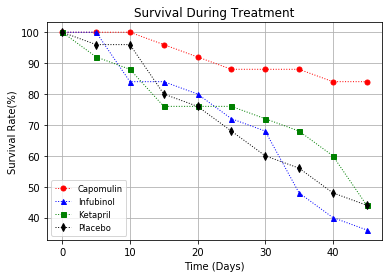

In [13]:
# Generate the Plot (Accounting for percentages)

capomulin_begin = reformat_sum_mouse.get_value(index = 0, col = 'Capomulin')
infubinol_begin = reformat_sum_mouse.get_value(index = 0, col = 'Infubinol')
ketapril_begin = reformat_sum_mouse.get_value(index = 0, col = 'Ketapril')
placebo_begin = reformat_sum_mouse.get_value(index = 0, col = 'Placebo')

capomulin_change = (capomulin_sum_mouse/ capomulin_begin) * 100
infubinol_change = (infubinol_sum_mouse/ infubinol_begin) * 100
ketapril_change = (ketapril_sum_mouse/ ketapril_begin) * 100
placebo_change = (placebo_sum_mouse/ placebo_begin) * 100

plt.plot(x, capomulin_change, color = 'red', marker = 'o', label = 'Capomulin', linestyle = ':', markersize = 5, linewidth = 1)
plt.plot(x, infubinol_change, color = 'blue', marker = '^', label = 'Infubinol', linestyle = ':', markersize = 5, linewidth = 1)
plt.plot(x, ketapril_change, color = 'green', marker = 's', label = 'Ketapril', linestyle = ':', markersize = 5, linewidth = 1)
plt.plot(x, placebo_change, color = 'black', marker = 'd', label = 'Placebo', linestyle = ':', markersize = 5, linewidth = 1)

plt.legend(fontsize = 8.35)
plt.grid()
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate(%)')

# Save the Figure
plt.savefig("Images/Survival_Rate.png")

# Show the Figure
plt.show()

In [14]:
# Calculate the percent changes for each drug
begin = combined_data[combined_data['Timepoint'] == 0]
survival_begin = begin.groupby(['Drug']).mean()['Tumor Volume (mm3)']

end = combined_data[combined_data['Timepoint'] == 45]
survival_end = end.groupby(['Drug']).mean()['Tumor Volume (mm3)']

percent_change = ((survival_end/survival_begin)-1)*100
# Display the data to confirm

percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

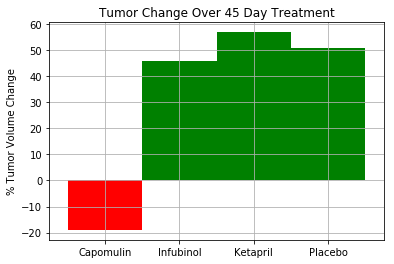

In [15]:
# Store all Relevant Percent Changes into a Tuple

percent_change_df = pd.DataFrame(data = percent_change)

# Splice the data between passing and failing drugs
percent_capomulin = percent_change_df.get_value(index = 'Capomulin', col = 'Tumor Volume (mm3)').astype('int64')
percent_infubinol = percent_change_df.get_value(index = 'Infubinol', col = 'Tumor Volume (mm3)').astype('int64')
percent_ketapril = percent_change_df.get_value(index = 'Ketapril', col = 'Tumor Volume (mm3)').astype('int64')
percent_placebo = percent_change_df.get_value(index = 'Placebo', col = 'Tumor Volume (mm3)').astype('int64')

percent_change_plot = pd.DataFrame({'label':['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], 'change' : [percent_capomulin, percent_infubinol, percent_ketapril, percent_placebo]})
percent_change_plot['positive'] = percent_change_plot['change'] > 0

# Orient widths. Add labels, tick marks, etc. 


percent_change_plot.plot.bar(x = 'label', y = 'change', width = 1, color = percent_change_plot.positive.map({True: 'g', False: 'r'}), rot=0, legend=False)

plt.xticks(np.arange(4))
plt.grid()
plt.xlabel('')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

# Use functions to label the percentages of changes

# def autolabel(bars):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for bar in percent_change_plot:
#        height = bar.get_height()
#        ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
#                '%d' % int(height),
#                ha='center', va='bottom', color = 'white')

# Call functions to implement the function calls

#autolabel(bars)

# Save the Figure
plt.savefig("Images/Tumor_Change.png")

# Show the Figure
plt.show()
